# Gathering

In [1]:
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1) image predections**

In [2]:
# get image-predictions.tsv from url

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(url.split("/")[-1],"wb") as file:
    file.write(response.content)

In [3]:
# read image-predictions file
image_pred_df = pd.read_csv("image-predictions.tsv",sep="\t")

**2) twitter archive**

In [4]:
# read twitter_archive_enhanced.csv 
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

**2) tweets data**<br><br>
**Note:**<br>cells below needs personal information which i removed, and markedown these cells so you will not find a problem runing the entire note book again.

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = image_pred_df.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')

            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:

            fails_dict[tweet_id] = e
            pass
        

In [5]:
# Converting JSON data to dataframe

selected_attr = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count'],})
        
tweets_df = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets'])

## Assessing

**1) Image Predections**

In [6]:
# take a look at the Data Frame
image_pred_df.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
# check for missing values, columns types, number of entries.
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
# what is the most confedient algorithm
image_pred_df.p1_conf.mean(), image_pred_df.p2_conf.mean(), image_pred_df.p3_conf.mean()

(0.59454826361445778, 0.13458860950039181, 0.060324168618106515)

In [9]:
# check whether img_num column has differant values or all the same, if True then the column is useless
sum(image_pred_df.img_num) == image_pred_df.shape[0]

False

### Quality Assessment:
- jpg_url column exists in twitter_archive Data Frame
- use p1 and remove p2 & p3 as p1 is more confident
- false entries at p1_dog
- p1_dog will become useless after all entries being true

**2) twitter_archive**

In [10]:
twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# investigate whther there are denominators != 10 
twitter_archive.rating_denominator.value_counts()              

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
# investigate nurmerators
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
# investigate sources
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality Assessment
- some denominators are not equal to 10
- some nurmerators are less than 10
- some nurmerators are far higher than 10
- rating_denominator column will be useless as all values will be equal 10 after cleaning
- retweets and replay related columns will become useless

### Tidiness Assessment
- 181 retweet needs to be removed 
- 78 replay needs to be removed so we don't replicate same data in differant rows
- doggo, floofer, pupper, puppo will be compacted in one column

**3) tweets_df**

In [15]:
tweets_df.head(20)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [16]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
tweets_df.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


**Tidiness issues:**<br><br>
- when i tried to merge this df i found that tweet_id column has some objects not all int

### Cleaning:

#### 1) image_pred_df

In [18]:
image_pred_clean = image_pred_df.copy()

**Problem: jpg_url column exists in twitter archive Data Frame**<br><br>
**Solution: drop jpg_url**

**Code:**

In [19]:
image_pred_clean.drop("jpg_url",axis=1, inplace=True)

**Test:**

In [20]:
"jpg_url" in list(image_pred_clean.columns)

False

In [21]:
image_pred_clean.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

**Problem: use p1 and remove p2 & p3 as p1 is more confident**<br><br>
**sloution: drop all p2 & p3 related columns**

**Code:**

In [22]:
image_pred_clean.drop(["p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"],axis = 1,inplace=True)

**Test:**

In [23]:
any(["p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"]) in list(image_pred_clean.columns)

False

In [24]:
image_pred_clean.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

**Problem: False entries at p1_dog**<br><br>
**Sloution: remove all rows with False entries** 

**Code:**

In [25]:
image_pred_clean = image_pred_clean.query("p1_dog == True")

**Test:**

In [26]:
image_pred_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [27]:
image_pred_clean.query("p1_dog == False")

,tweet_id,img_num,p1,p1_conf,p1_dog


**Problem: p1_dog became useless after all entries True**
<br><br>
**Sloutin: drop p1_dog column**

**Code:**

In [28]:
image_pred_clean.drop("p1_dog",axis=1,inplace=True)

**Test:**

In [29]:
"p1_dog" in list(image_pred_clean.columns)

False

In [30]:
image_pred_clean.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf'], dtype='object')

**2) Twitter Archive**

In [31]:
twitter_arch_clean = twitter_archive.copy()

**Quality Issues**

**Problem: some denominators are not equla 10**<br>
**Sloution: remove all rows with entry != 10, as it's knowen that the base rating is 10 So higher or lower might be
just for humor**

**Code:**

In [32]:
twitter_arch_clean = twitter_arch_clean.query("rating_denominator == 10")

**Test:**

In [33]:
twitter_arch_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

In [34]:
# sum of entries that != 10
sum(twitter_arch_clean.rating_denominator != 10)

0

**Problem: Some nurmerators are less than 10**<br>
**Sloution: Check whether these values ar true or just for humor, if false: drop else: keep**

**Code:**

In [35]:
#create a list with numerators less than 10
num_less_10 = list()
n = dict(twitter_archive.rating_numerator.value_counts())
for key in n:
    if key < 10:
        num_less_10.append(key)
# check the tweet 
for num in num_less_10:
    print(f'Rating number: {num}')
    for i in range(0,len(twitter_archive.index)):
        if twitter_archive.rating_numerator[i] == num:
            print(twitter_archive.tweet_id[i])
            print(twitter_archive.text[i])
            print(twitter_archive.expanded_urls[i])
            print(twitter_archive.retweeted_status_id[i])
            print(twitter_archive.in_reply_to_status_id[i])
            print(twitter_archive.source[i])
            print(twitter_archive.index[i])
            print()
            print()

Rating number: 9
814578408554463233
RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
https://twitter.com/dog_rates/status/698195409219559425/photo/1
6.9819540922e+17
nan
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
485


775096608509886464
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1
7.40373189193e+17
nan
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
784


766423258543644672
This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with

**it appears that the most of numerators that are lower than 10 are just for humor even most of them are not dogs**<br>
**So i will drop numerators less than 10**<br><br>
**Code:**

In [36]:
twitter_arch_clean = twitter_arch_clean.query("rating_numerator >= 10")

**Test:**

In [37]:
# sum of nurmerators that are less than 10
sum(twitter_arch_clean.rating_numerator < 10)

0

**Problem: numerators that are pretty higher than 10.**<br>
**Sloution: when i searched what is the highest possibale rating i found that is 14/10 is reserved for heros and higher ratings are for humor, SO i will remove nurmerators higher than 14. <br>Note: source provided below** 

**Code:**

In [38]:
twitter_arch_clean = twitter_arch_clean.query("rating_numerator <= 14")

**Test:**

In [39]:
twitter_arch_clean.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
14     54
Name: rating_numerator, dtype: int64

**Problem: rating_denominator column became useless becaues all values became 10**<br>
**Sloution: drop rating_denominator**

In [40]:
twitter_arch_clean.drop("rating_denominator",axis=1,inplace=True)

In [41]:
"rating_denominator" in list(twitter_arch_clean.columns) 

False

In [42]:
twitter_arch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**because of programatic reasons i will drop non null entries from retweets and replays columns then i will deal with the last quality issue which is droping unnecessary columns**

## Tidiness Issues

**Problem: twitter_archive.info() shows that there are 181 retweet needs to be droped**<br>
**Sloution: drop retweeted_status_id non nulls entries**<br><br>
**Code:**

In [43]:
twitter_arch_clean.drop(twitter_arch_clean[twitter_arch_clean.retweeted_status_id.notnull()].index, inplace = True)

**Test:**

In [44]:
twitter_arch_clean.retweeted_status_id.notnull().sum()

0

**Problem: twitter_archive.info() shows that there are 78 retweet needs to be droped**<br>
**Sloution: drop in_reply_to_status_id non nulls entries**<br><br>
**Code:**

In [45]:
twitter_arch_clean.drop(twitter_arch_clean[twitter_arch_clean.in_reply_to_status_id.notnull()].index, inplace = True)

**Test:**

In [46]:
twitter_arch_clean.in_reply_to_status_id.notnull().sum()

0

**Problem:"doggo", "floofer", "pupper", "puppo" columns needs to be compacted in one column**<br>
**Sloution: create one column that join them all called dog_type**<br><br>
**Code:**

In [47]:
twitter_arch_clean["dog_type"] = 'None'

In [48]:
for i in range(twitter_arch_clean.shape[0]):
    if twitter_arch_clean.iloc[i].doggo != 'None':
        twitter_arch_clean.dog_type.iloc[i] = twitter_arch_clean.iloc[i].doggo
    elif twitter_arch_clean.iloc[i].floofer != 'None':
        twitter_arch_clean.dog_type.iloc[i] = twitter_arch_clean.iloc[i].floofer    
    elif twitter_arch_clean.iloc[i].pupper != 'None':
        twitter_arch_clean.dog_type.iloc[i] = twitter_arch_clean.iloc[i].pupper
    elif twitter_arch_clean.iloc[i].puppo != 'None':
        twitter_arch_clean.dog_type.iloc[i] = twitter_arch_clean.iloc[i].puppo
    else:
        continue
        
        

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Continue Quality Issues

**Problem: retweet, replay, differant dogs types columns became useless**<br>
**Sloution: Drop Them**<br><br>
**Code:**

In [49]:
columns_2 = ["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id",\
            "retweeted_status_timestamp", "doggo","floofer","pupper","puppo"]
twitter_arch_clean.drop(columns_2,axis=1,inplace=True)

**Test:**

In [50]:
twitter_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'name', 'dog_type'],
      dtype='object')

### Merge Data Frames

In [51]:
# ensure that tweet_id type is object

twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(str)
tweets_df.tweet_id = tweets_df.tweet_id.astype(str)
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)

In [52]:
master_1 = pd.merge(twitter_arch_clean,tweets_df,on="tweet_id",how="inner")

In [53]:
master_df = pd.merge(master_1,image_pred_clean,on = 'tweet_id',how='inner')

In [54]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 0 to 1227
Data columns (total 13 columns):
tweet_id            1228 non-null object
timestamp           1228 non-null object
source              1228 non-null object
text                1228 non-null object
expanded_urls       1228 non-null object
rating_numerator    1228 non-null int64
name                1228 non-null object
dog_type            1228 non-null object
favorites           1228 non-null int64
retweets            1228 non-null int64
img_num             1228 non-null int64
p1                  1228 non-null object
p1_conf             1228 non-null float64
dtypes: float64(1), int64(4), object(8)
memory usage: 134.3+ KB


**Save cleaned files**

In [55]:
master_df.to_csv('master_df.csv',index=False)
twitter_arch_clean.to_csv('twitter_arch_clean.csv',index=False)
tweets_df.to_csv('tweets_df.csv',index=False)
image_pred_clean.to_csv('image_pred_clean.csv',index=False)

## Analyzing

In [56]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_type,favorites,retweets,img_num,p1,p1_conf
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,33819,6514,1,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,25461,4328,1,Chihuahua,0.716012
2,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,41048,9774,2,basset,0.555712
3,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,None,20562,3261,1,Chesapeake_Bay_retriever,0.425595
4,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,None,12041,2158,1,Appenzeller,0.341703


In [57]:
master_df.dog_type.value_counts()

None       1024
pupper      125
doggo        54
puppo        18
floofer       7
Name: dog_type, dtype: int64

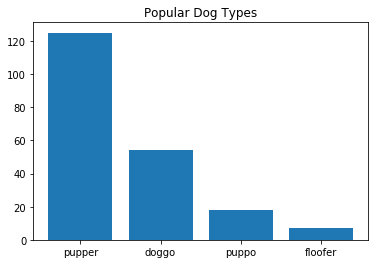

In [58]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
count = [125,54,18,7]
x = np.arange(4)
plt.bar(x,count);
plt.xticks(x, (dog_type));
plt.title("Popular Dog Types");
plt.savefig('dog_types.png');

In [59]:
master_df.p1.value_counts()

golden_retriever                  127
Labrador_retriever                 83
Pembroke                           83
Chihuahua                          62
chow                               41
pug                                40
Samoyed                            39
Pomeranian                         37
toy_poodle                         32
malamute                           26
cocker_spaniel                     25
Chesapeake_Bay_retriever           20
French_bulldog                     20
Eskimo_dog                         18
Siberian_husky                     18
miniature_pinscher                 17
German_shepherd                    17
Staffordshire_bullterrier          16
Cardigan                           16
Rottweiler                         14
Shih-Tzu                           14
Shetland_sheepdog                  13
beagle                             13
Maltese_dog                        13
American_Staffordshire_terrier     12
basset                             12
Great_Pyrene

In [60]:
master_df.retweets.describe()

count     1228.000000
mean      3156.364007
std       5115.098422
min         16.000000
25%        827.250000
50%       1786.500000
75%       3686.500000
max      79515.000000
Name: retweets, dtype: float64

In [61]:
master_df.favorites.describe()

count      1228.000000
mean      10562.111564
std       13318.864415
min          81.000000
25%        2682.500000
50%        5846.000000
75%       13755.250000
max      132810.000000
Name: favorites, dtype: float64

In [62]:
master_df.name.value_counts()

None         290
a             25
Charlie       10
Cooper         9
Oliver         8
Lucy           8
Tucker         7
Penny          6
Sadie          6
Daisy          6
Koda           6
Stanley        5
Leo            5
Winston        5
Bo             5
Jax            5
Chester        4
Bear           4
Finn           4
Dave           4
Rusty          4
Scooter        4
Louis          4
Cassie         4
Lola           4
Reggie         4
Bentley        3
Milo           3
Gus            3
Max            3
            ... 
Sugar          1
Lucia          1
Suki           1
Trigger        1
DonDon         1
Emmy           1
Major          1
Atticus        1
Arlo           1
Sprinkles      1
Pilot          1
Colin          1
Noosh          1
Tyrone         1
Bradley        1
Django         1
O              1
Rizzo          1
Herald         1
Harper         1
Blitz          1
BeBe           1
Marvin         1
Rubio          1
Kenzie         1
Livvie         1
Eriq           1
Kona          

In [76]:
# the dog who got the maximum retweets
pd.set_option('display.max_colwidth', -1)
master_df[master_df.retweets == master_df.retweets.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_type,favorites,retweets,img_num,p1,p1_conf
592,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,None,doggo,131075,79515,1,Labrador_retriever,0.825333


In [75]:
# the dog with maximum faviourets
master_df[master_df.favorites == master_df.favorites.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_type,favorites,retweets,img_num,p1,p1_conf
245,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,None,puppo,132810,48265,1,Lakeland_terrier,0.196015


In [73]:
# golden retrevire with the maximum favorites number

max_fav_golden = master_df.query("p1 == 'golden_retriever'")["favorites"].max()
master_df.query("p1 == 'golden_retriever' and favorites == {}".format(max_fav_golden))

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_type,favorites,retweets,img_num,p1,p1_conf
81,870374049280663552,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,https://twitter.com/dog_rates/status/870374049280663552/photo/1,13,Zoey,None,85011,27680,1,golden_retriever,0.841001


In [74]:
# golden retrevire with the maximum retweets number

max_ret_golden = master_df.query("p1 == 'golden_retriever'")["retweets"].max()
master_df.query("p1 == 'golden_retriever' and retweets == {}".format(max_ret_golden))

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_type,favorites,retweets,img_num,p1,p1_conf
361,795464331001561088,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Elder doggo does a splash. Both 13/10 incredible stuff https://t.co/gBUDjdEcqz,https://twitter.com/dog_rates/status/795464331001561088/video/1,13,None,doggo,55683,27728,1,golden_retriever,0.193082


# Conclusions
- The most popular dog type is pupper
- the most popular dog based on image predections is golden retrevire
- golden retrevire dog who got the maximum number of favoriets is 'zoey' with 85011
- golden retrevire who got the maximum number of retweets 27728
- average retweets is 3156
- maximum retweets is 79515
- mean favoriets is 3156
- maximum favoriets is 132810
- the most popular dog name Charlie, Cooper, Lucy, Oliver, Tucker respectively

# Sources:
https://twitter.com/dog_rates/status/912103168309432320?lang=en >>>>>> Highest Rating